In [233]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime as dt

In [234]:
bike = pd.read_csv('../kaggle/data/df_rides.csv')
# https://github.com/josegrlopes/bikesharingsystem_BrasiliaBR

In [235]:
bike.info()
# Total data 287.322
#ride_data = ok
#time_start = ok
#station_start = ok
# station_end = ok

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287322 entries, 0 to 287321
Data columns (total 10 columns):
user_gender       286926 non-null object
user_birthdate    287321 non-null object
user_residence    107417 non-null object
ride_date         287322 non-null object
time_start        287322 non-null object
time_end          244037 non-null object
station_start     287322 non-null object
station_end       287322 non-null object
ride_duration     214148 non-null float64
ride_late         214148 non-null float64
dtypes: float64(2), object(8)
memory usage: 21.9+ MB


In [236]:
#Retirei uma data de nascimento null.
bike.drop(index=37921,axis=0,inplace=True)
bike.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 287321 entries, 0 to 287321
Data columns (total 10 columns):
user_gender       286925 non-null object
user_birthdate    287321 non-null object
user_residence    107416 non-null object
ride_date         287321 non-null object
time_start        287321 non-null object
time_end          244036 non-null object
station_start     287321 non-null object
station_end       287321 non-null object
ride_duration     214147 non-null float64
ride_late         214147 non-null float64
dtypes: float64(2), object(8)
memory usage: 24.1+ MB


In [237]:
bike.reset_index(inplace=True)
bike.head()

,index,user_gender,user_birthdate,user_residence,ride_date,time_start,time_end,station_start,station_end,ride_duration,ride_late
0,0,M,1971-06-08,NaN,2018-01-01,06:05:18,06:21:33,11 - Rodoviária 2,41 - Instituto de Artes,16.250000,0.0
1,1,M,1989-02-11,DF,2018-01-01,06:27:01,06:32:17,26 - Ministério da Saude,28 - CNMP - Conselho Nacional do Ministério Pú...,5.266667,0.0
2,2,M,1968-07-19,NaN,2018-01-01,06:29:33,06:44:57,11 - Rodoviária 2,43 - Biblioteca Central,15.400000,0.0
3,3,M,1991-12-19,NaN,2018-01-01,06:53:53,06:59:45,10 - Ministério dos Transportes,6 - Rodoviária,5.866667,0.0
4,4,M,1969-03-03,DF,2018-01-01,06:58:56,17:40:04,15 - Brasil 21,11 - Rodoviária 2,641.133333,1.0


In [238]:
bike.drop(columns='index', inplace=True)

In [239]:
bike.head()

,user_gender,user_birthdate,user_residence,ride_date,time_start,time_end,station_start,station_end,ride_duration,ride_late
0,M,1971-06-08,NaN,2018-01-01,06:05:18,06:21:33,11 - Rodoviária 2,41 - Instituto de Artes,16.250000,0.0
1,M,1989-02-11,DF,2018-01-01,06:27:01,06:32:17,26 - Ministério da Saude,28 - CNMP - Conselho Nacional do Ministério Pú...,5.266667,0.0
2,M,1968-07-19,NaN,2018-01-01,06:29:33,06:44:57,11 - Rodoviária 2,43 - Biblioteca Central,15.400000,0.0
3,M,1991-12-19,NaN,2018-01-01,06:53:53,06:59:45,10 - Ministério dos Transportes,6 - Rodoviária,5.866667,0.0
4,M,1969-03-03,DF,2018-01-01,06:58:56,17:40:04,15 - Brasil 21,11 - Rodoviária 2,641.133333,1.0


In [240]:
bike['ride_date'].min()

'2018-01-01'

In [241]:
bike['ride_date'].max()

'2018-08-31'

In [242]:
len(bike['station_start'].unique())

50

In [243]:
len(bike['station_end'].unique())

50

In [244]:
bike['user_birthdate'] = bike['user_birthdate'].apply( lambda x: dt.strptime(x, '%Y-%m-%d'))

In [247]:
bike['user_birthdate'][0].year

1971

In [248]:
bike['age'] = 0
bike.head()

,user_gender,user_birthdate,user_residence,ride_date,time_start,time_end,station_start,station_end,ride_duration,ride_late,age
0,M,1971-06-08,NaN,2018-01-01,06:05:18,06:21:33,11 - Rodoviária 2,41 - Instituto de Artes,16.250000,0.0,0
1,M,1989-02-11,DF,2018-01-01,06:27:01,06:32:17,26 - Ministério da Saude,28 - CNMP - Conselho Nacional do Ministério Pú...,5.266667,0.0,0
2,M,1968-07-19,NaN,2018-01-01,06:29:33,06:44:57,11 - Rodoviária 2,43 - Biblioteca Central,15.400000,0.0,0
3,M,1991-12-19,NaN,2018-01-01,06:53:53,06:59:45,10 - Ministério dos Transportes,6 - Rodoviária,5.866667,0.0,0
4,M,1969-03-03,DF,2018-01-01,06:58:56,17:40:04,15 - Brasil 21,11 - Rodoviária 2,641.133333,1.0,0


In [250]:
bike['age'] = bike['user_birthdate'].apply( lambda x: int((dt.now() - x).days/365))

In [251]:
bike.head()

,user_gender,user_birthdate,user_residence,ride_date,time_start,time_end,station_start,station_end,ride_duration,ride_late,age
0,M,1971-06-08,NaN,2018-01-01,06:05:18,06:21:33,11 - Rodoviária 2,41 - Instituto de Artes,16.250000,0.0,48
1,M,1989-02-11,DF,2018-01-01,06:27:01,06:32:17,26 - Ministério da Saude,28 - CNMP - Conselho Nacional do Ministério Pú...,5.266667,0.0,30
2,M,1968-07-19,NaN,2018-01-01,06:29:33,06:44:57,11 - Rodoviária 2,43 - Biblioteca Central,15.400000,0.0,51
3,M,1991-12-19,NaN,2018-01-01,06:53:53,06:59:45,10 - Ministério dos Transportes,6 - Rodoviária,5.866667,0.0,27
4,M,1969-03-03,DF,2018-01-01,06:58:56,17:40:04,15 - Brasil 21,11 - Rodoviária 2,641.133333,1.0,50


In [253]:
bike[bike['age']<0]

,user_gender,user_birthdate,user_residence,ride_date,time_start,time_end,station_start,station_end,ride_duration,ride_late,age
25214,M,2021-03-30,NaN,2018-02-01,11:58:10,12:03:48,6 - Rodoviária,20 - SAS,5.633333,0.0,-1
25218,M,2021-08-20,DF,2018-02-01,12:04:39,12:15:39,21 - EQS 202 / 203,34 - Shopping Mall,11.000000,0.0,-1
25273,F,2021-08-14,NaN,2018-02-01,13:02:59,13:18:30,2 - Praça Buriti,11 - Rodoviária 2,15.516667,0.0,-1
25275,M,2021-08-04,DF,2018-02-01,13:03:42,13:18:27,38 - SQN 205,41 - Instituto de Artes,14.750000,0.0,-1
25276,F,2021-08-04,DF,2018-02-01,13:03:49,13:18:32,2 - Praça Buriti,11 - Rodoviária 2,14.716667,0.0,-1
...,...,...,...,...,...,...,...,...,...,...,...
43669,F,2020-12-28,NaN,2018-02-28,08:19:56,08:29:20,35 - CLN 403,39 - CLN 406,9.400000,0.0,-1
43843,M,2021-01-28,NaN,2018-02-28,12:41:58,13:03:42,39 - CLN 406,23 - STF,21.733333,0.0,-1
43916,M,2021-11-05,NaN,2018-02-28,13:34:50,13:40:35,34 - Shopping Mall,32 - SQS 305,5.750000,0.0,-1
44163,M,2026-03-18,NaN,2018-02-28,17:39:02,18:31:05,15 - Brasil 21,15 - Brasil 21,52.050000,0.0,-6


In [254]:
# Removendo idades menos que 5.
bike = bike[bike['age'] > 5]

In [255]:
bike.head()

,user_gender,user_birthdate,user_residence,ride_date,time_start,time_end,station_start,station_end,ride_duration,ride_late,age
0,M,1971-06-08,NaN,2018-01-01,06:05:18,06:21:33,11 - Rodoviária 2,41 - Instituto de Artes,16.250000,0.0,48
1,M,1989-02-11,DF,2018-01-01,06:27:01,06:32:17,26 - Ministério da Saude,28 - CNMP - Conselho Nacional do Ministério Pú...,5.266667,0.0,30
2,M,1968-07-19,NaN,2018-01-01,06:29:33,06:44:57,11 - Rodoviária 2,43 - Biblioteca Central,15.400000,0.0,51
3,M,1991-12-19,NaN,2018-01-01,06:53:53,06:59:45,10 - Ministério dos Transportes,6 - Rodoviária,5.866667,0.0,27
4,M,1969-03-03,DF,2018-01-01,06:58:56,17:40:04,15 - Brasil 21,11 - Rodoviária 2,641.133333,1.0,50


In [256]:
cols = [10,0,1,2,3,4,5,6,7,8,9]
bike = bike[bike.columns[cols]]
bike.head()

,age,user_gender,user_birthdate,user_residence,ride_date,time_start,time_end,station_start,station_end,ride_duration,ride_late
0,48,M,1971-06-08,NaN,2018-01-01,06:05:18,06:21:33,11 - Rodoviária 2,41 - Instituto de Artes,16.250000,0.0
1,30,M,1989-02-11,DF,2018-01-01,06:27:01,06:32:17,26 - Ministério da Saude,28 - CNMP - Conselho Nacional do Ministério Pú...,5.266667,0.0
2,51,M,1968-07-19,NaN,2018-01-01,06:29:33,06:44:57,11 - Rodoviária 2,43 - Biblioteca Central,15.400000,0.0
3,27,M,1991-12-19,NaN,2018-01-01,06:53:53,06:59:45,10 - Ministério dos Transportes,6 - Rodoviária,5.866667,0.0
4,50,M,1969-03-03,DF,2018-01-01,06:58:56,17:40:04,15 - Brasil 21,11 - Rodoviária 2,641.133333,1.0


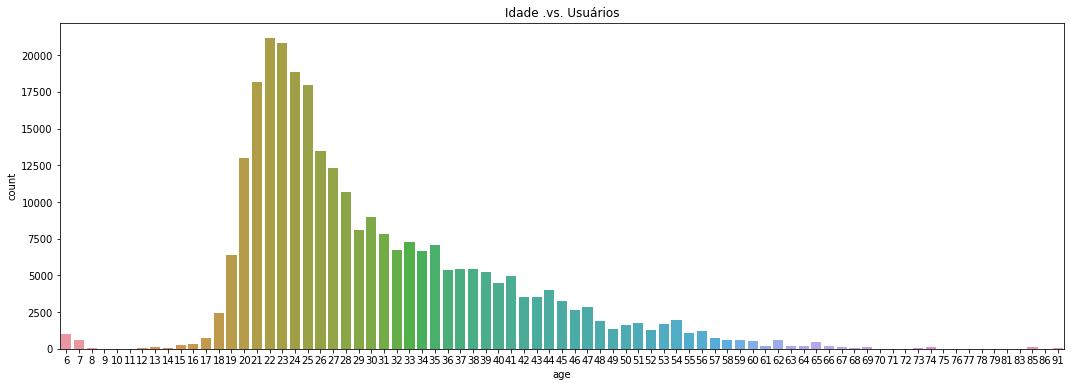

In [272]:
fig = plt.figure(figsize=(18,6))
sns.countplot(x='age', data=bike).set_title('Idade .vs. Usuários');

In [273]:
bike.head()

,age,user_gender,user_birthdate,user_residence,ride_date,time_start,time_end,station_start,station_end,ride_duration,ride_late
0,48,M,1971-06-08,NaN,2018-01-01,06:05:18,06:21:33,11 - Rodoviária 2,41 - Instituto de Artes,16.250000,0.0
1,30,M,1989-02-11,DF,2018-01-01,06:27:01,06:32:17,26 - Ministério da Saude,28 - CNMP - Conselho Nacional do Ministério Pú...,5.266667,0.0
2,51,M,1968-07-19,NaN,2018-01-01,06:29:33,06:44:57,11 - Rodoviária 2,43 - Biblioteca Central,15.400000,0.0
3,27,M,1991-12-19,NaN,2018-01-01,06:53:53,06:59:45,10 - Ministério dos Transportes,6 - Rodoviária,5.866667,0.0
4,50,M,1969-03-03,DF,2018-01-01,06:58:56,17:40:04,15 - Brasil 21,11 - Rodoviária 2,641.133333,1.0


In [274]:
bike['ride_date'] = bike['ride_date'].apply( lambda x: dt.strptime(x, '%Y-%m-%d'))

In [275]:
bike['month'] = 0

In [276]:
bike['month'] = bike['ride_date'].apply( lambda x: int((x.month)))

In [278]:
bike.head(2)

,age,user_gender,user_birthdate,user_residence,ride_date,time_start,time_end,station_start,station_end,ride_duration,ride_late,month
0,48,M,1971-06-08,NaN,2018-01-01,06:05:18,06:21:33,11 - Rodoviária 2,41 - Instituto de Artes,16.250000,0.0,1
1,30,M,1989-02-11,DF,2018-01-01,06:27:01,06:32:17,26 - Ministério da Saude,28 - CNMP - Conselho Nacional do Ministério Pú...,5.266667,0.0,1


In [280]:
bike_per_month = bike.groupby('month').count().reset_index()

In [285]:
bike_per_month.replace()

TypeError: rename() got an unexpected keyword argument "value"

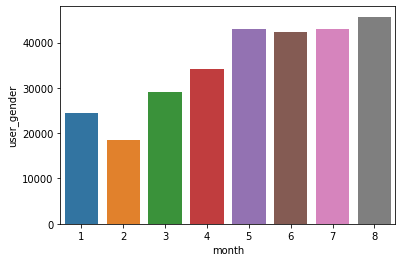

In [283]:
sns.barplot(x=bike_per_month['month'], y=bike_per_month['user_gender']);